<a href="https://colab.research.google.com/github/Devanshujoshi07/DATA_ANALYSIS-ROJECT/blob/main/data_analysis_project_ipynbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install IPython
get_ipython().magic('reset -sf')
# from IPython.display import get_ipython

from IPython.display import display
!pip install -qq -U datasets kagglehub pandas
from datasets import load_dataset
import kagglehub
import pandas as pd
import os
# dataset=load_dataset("bismasajjad/global-ai-job-market-and-salary-trends-2025")
# df=dataset['path'].to_pandas()

# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
Path to dataset files: /kaggle/input/global-ai-job-market-and-salary-trends-2025


In [ ]:
!ls {path}

ai_job_dataset.csv


In [ ]:
# csv_file_path=os.path.join(path,"global_ai_job_market_and_salary_trends_2025.csv")
# Assuming the !ls {path} command shows the correct filename.
# If the filename is different, update the string below with the actual filename.
csv_file_path=os.path.join(path,"ai_job_dataset.csv")
df=pd.read_csv(csv_file_path)
# df=pd.read_csv(csv_file_path)

In [ ]:
# df['salary_usd'].sort_values(ascending=False).head()
# df['salary_usd'].max() #for find the maximun salary in column

In [ ]:
# df.iloc[df['salary_usd'].idxmax()] #for finding the entry of the max salary

In [ ]:
df_da_india=df[df['company_location']=='India'].sort_values(by='salary_usd',ascending=False).head()

In [ ]:
df_india_pivot=df_da_india.pivot_table(index='job_title',columns='company_location',values='salary_usd',aggfunc='median')
df_india_pivot

company_location,India
job_title,
AI Specialist,203146.0
Computer Vision Engineer,197244.0
NLP Engineer,200593.5
Research Scientist,198957.0


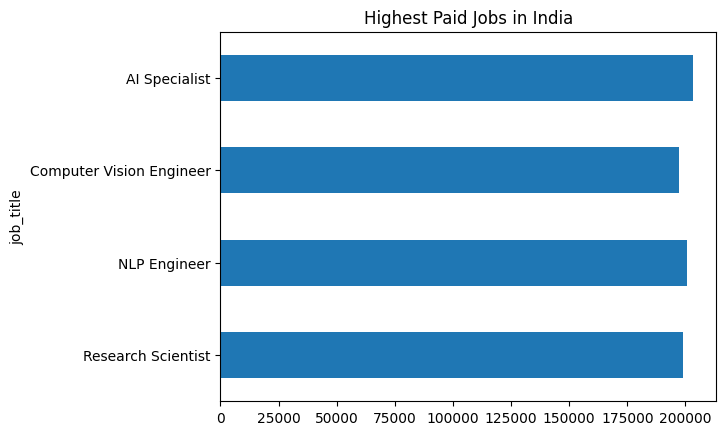

In [ ]:
import matplotlib.pyplot as plt
df_india_pivot.plot(kind='barh')
plt.title('Highest Paid Jobs in India')
plt.legend().set_visible(False)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df_data_month=pd.to_datetime(df['posting_date']).dt.strftime('%Y')

In [ ]:
df['job_posting_month']=df_data_month

In [ ]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,job_posting_month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,2024
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,2025
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,2024
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,2025
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,2024
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,2024
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,2024


In [ ]:
# df['job_posting_month'].value_counts(ascending=False).head()

In [ ]:
df['required_skills']

,required_skills
0,"Tableau, PyTorch, Kubernetes, Linux, NLP"
1,"Deep Learning, AWS, Mathematics, Python, Docker"
2,"Kubernetes, Deep Learning, Java, Hadoop, NLP"
3,"Scala, SQL, Linux, Python"
4,"MLOps, Java, Tableau, Python"
...,...
14995,"Java, Kubernetes, Azure"
14996,"Mathematics, Docker, SQL, Deep Learning"
14997,"Scala, Spark, NLP"
14998,"Java, Computer Vision, Python, TensorFlow"


In [ ]:
df['required_skills']=df['required_skills'].str.split(',')

In [ ]:
df_skills_required=df.explode('required_skills')
df_skills_required

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,job_posting_month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Tableau,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,PyTorch,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Kubernetes,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Linux,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,NLP,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Scala,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,2024
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Azure,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,2024
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,Deep Learning,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,2024
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,GCP,PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations,2024


In [ ]:
# df_top_skill=df_skills_required['required_skills'].value_counts().head()


In [ ]:
# df_pivoting=df_skills_required.pivot_table(index='job_posting_month',columns='required_skills',aggfunc='size',fill_value=0)
# df_pivoting
# df_pivoting=df_pivoting.reset_index()
# df_pivoting['job_month_posting']=df['job_posting_month'].apply(lambda x:pd.to_datetime(x,format='%Y').strftime('%b'))
# df_pivoting=df_pivoting.set_index('job_month_posting')
# df_pivoting=df_pivoting.drop(columns='job_posting_month')
# df_pivoting

In [ ]:
# df_pivoting=df_skills_required.pivot_table(index='job_posting_month',columns='required_skills',aggfunc='size',fill_value=0)
# df_pivoting

In [ ]:
# df_pivoting.iloc[:,:5].plot(kind='line',figsize=(5,5))
# plt.xlabel('month')
# plt.ylabel('Job Opening')
# plt.title('Top 5 skills required for the year 2024')
# plt.show()

In [ ]:
# sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')

# df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

# df_DA_skills